# Weather Data Analysis and Classification

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {title}')
    plt.show()


### Loading the Dataset

In [2]:
# Load Dataset
data = pd.read_csv("weather.csv")
data.info()

# Convert date column to datetime and check for missing values
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')

print(data.isnull().sum())
data.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


### Exploratory Data Analysis (EDA)

In [17]:
# Check dataset structure and unique values
print(data.isnull().sum())
# Convert the data type into datetime
if 'date' in data.columns:
	data['date'] = pd.to_datetime(data['date'], errors='coerce')
print(data.columns)
print(data.nunique())


precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64
Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')
precipitation    111
temp_max          67
temp_min          55
wind              79
weather            5
dtype: int64


### Data Visualization

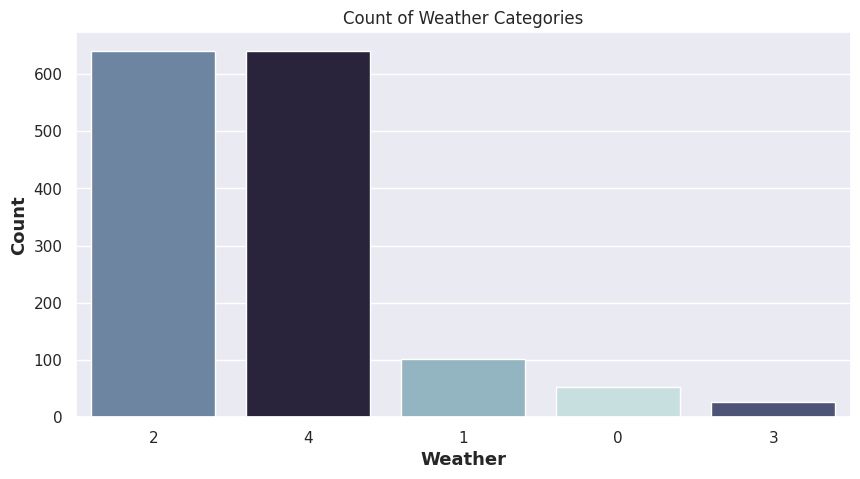

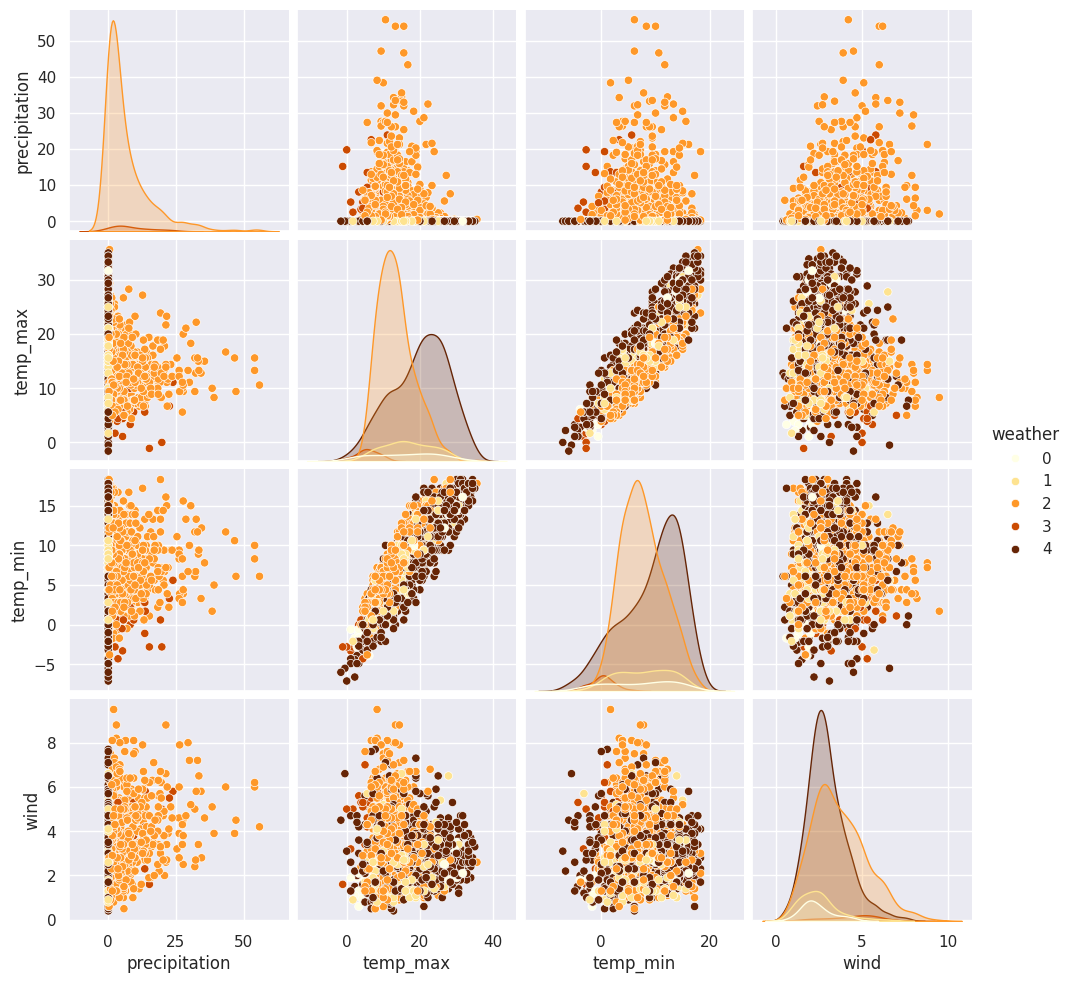

<Figure size 1000x500 with 0 Axes>

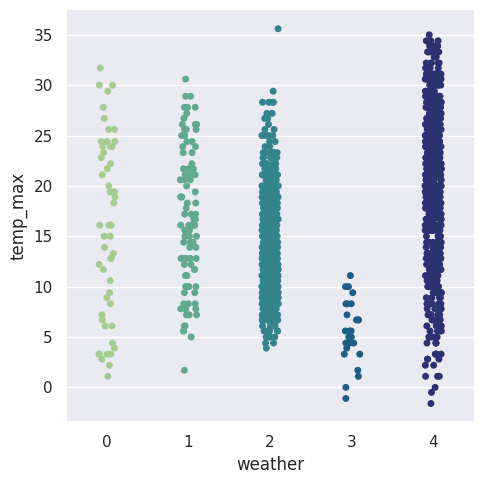

<Figure size 1000x500 with 0 Axes>

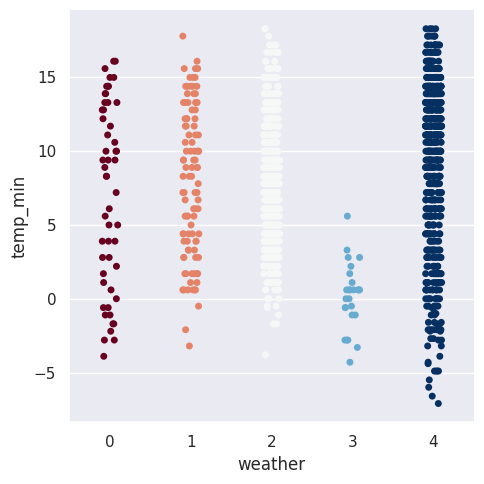

In [ ]:
# Value counts for the weather category
plt.figure(figsize=(10, 5))
sns.countplot(x='weather', hue='weather', data=data, order=data['weather'].value_counts().index, palette="ch:start=.2,rot=-.3", dodge=False, legend=False)
plt.xlabel("Weather", fontweight='bold', size=13)
plt.ylabel("Count", fontweight='bold', size=13)
plt.title("Count of Weather Categories")
plt.show()

# Line plots for temperature and wind speed variations over time
if 'date' in data.columns and 'temp_max' in data.columns:
    fig1 = px.line(data, x='date', y='temp_max', title='Variation of Maximum Temperature')
    fig1.show()

if 'date' in data.columns and 'temp_min' in data.columns:
    fig2 = px.line(data, x='date', y='temp_min', title='Variation of Minimum Temperature')
    fig2.show()

if 'date' in data.columns and 'wind' in data.columns:
    fig3 = px.line(data, x='date', y='wind', title='Variation of Wind Speed Over Time')
    fig3.show()

# Pair plots to examine relationships
if 'weather' in data.columns:
    sns.pairplot(data.drop('date', axis=1, errors='ignore'), hue='weather', palette="YlOrBr")
    plt.show()
plt.figure(figsize=(10,5))
sns.catplot(x='weather', y='temp_max', hue='weather', data=data, palette="crest", legend=False)
plt.show()

plt.figure(figsize=(10,5))
sns.catplot(x='weather', y='temp_min', hue='weather', data=data, palette="RdBu", legend=False)
plt.show()


### Data Preprocessing

In [5]:
# Label Encoding
def label_encoding(column):
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])

label_encoding("weather")
data = data.drop('date', axis=1)
X = data.drop('weather', axis=1)
y = data['weather']


### Train-Test Split

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Model Training and Evaluation

In [7]:
# Model Evaluation Function
def evaluate_model(classifier, model_name):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy Score: {acc:.2f}")
    plot_confusion_matrix(y_test, y_pred, model_name)
    return y_pred


Logistic Regression Accuracy Score: 0.76


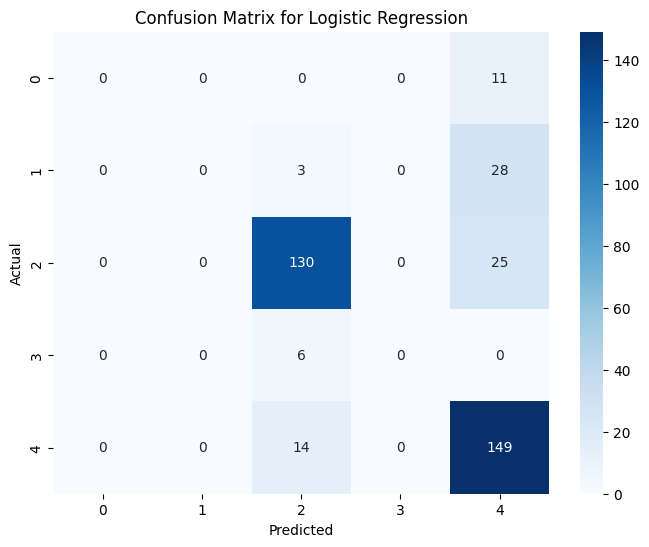

array([4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2,
       4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,

In [8]:
# Logistic Regression
logistic_classifier = LogisticRegression(random_state=0)
evaluate_model(logistic_classifier, "Logistic Regression")


Support Vector Machine Accuracy Score: 0.80


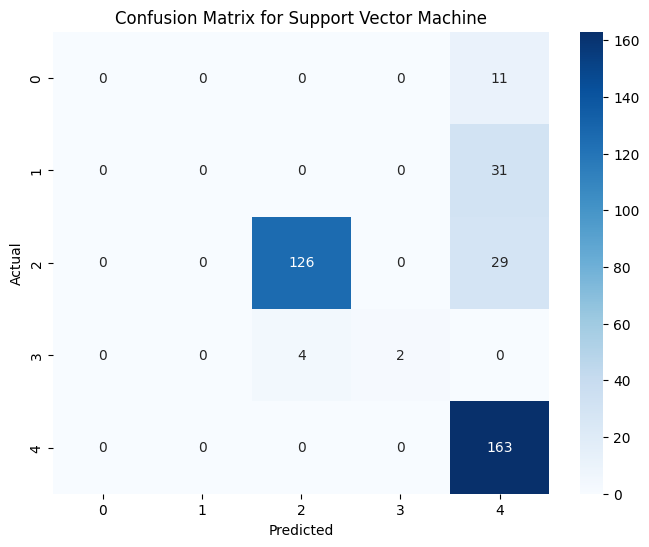

array([4, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 2, 4, 2, 3, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 3, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,

In [9]:
# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', random_state=0)
evaluate_model(svm_classifier, "Support Vector Machine")


Naive Bayes Accuracy Score: 0.84


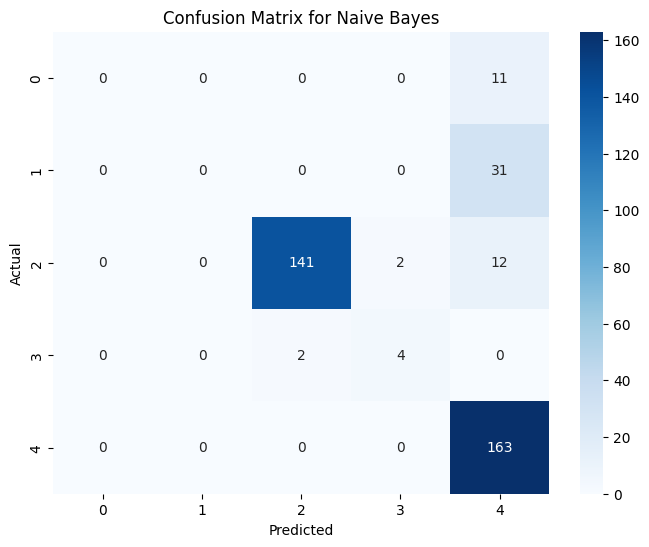

array([4, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 2, 3, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 2, 4, 4, 2, 4, 2, 3, 4, 4, 4, 4, 2, 4, 4, 2, 3, 4, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 4, 4, 4, 4, 2, 3, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4,
       4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,

In [10]:
# Naive Bayes
nb_classifier = GaussianNB()
evaluate_model(nb_classifier, "Naive Bayes")


In [ ]:
# Decision Tree
dt_classifier = DecisionTreeClassifier()
evaluate_model(dt_classifier, "Decision Tree")


K-Nearest Neighbors Accuracy Score: 0.68


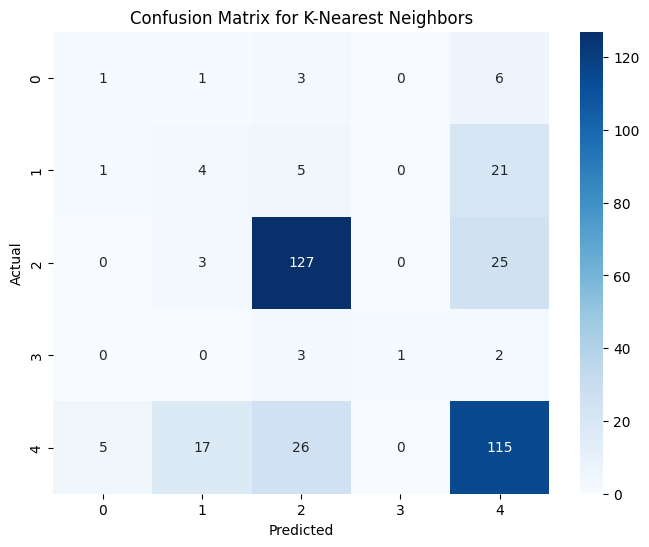

array([4, 2, 2, 4, 0, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 4, 1, 2, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 0, 4, 4, 4, 4, 4, 4, 2, 2, 4, 1, 2, 4, 2, 2, 2, 4, 4, 1, 2,
       4, 1, 4, 2, 2, 2, 2, 1, 1, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 0, 4, 2,
       4, 2, 4, 0, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 1, 4,
       2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 0, 4, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 1,
       1, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2,
       1, 1, 4, 4, 4, 4, 4, 4, 2, 1, 4, 2, 1, 4, 4, 4, 1, 4, 2, 2, 4, 1,
       4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       1, 4, 4, 2, 4, 4, 4, 4, 4, 4, 1, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2,
       4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 2, 4, 1, 4, 1,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 0, 4,
       1, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,

In [13]:
# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
evaluate_model(knn_classifier, "K-Nearest Neighbors")


### Conclusion
This project demonstrates the application of multiple machine learning models for weather condition prediction.